<a href="https://colab.research.google.com/github/civilizwa/-/blob/main/%E5%8E%9F%E5%A7%8BMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""实验要求：
1.运行原始MLP，查看网络结构、损失、准确度曲线
2.调整全连接层参数（宽度、深度）、优化器参数、优化器、增加dropout、迭代次数、增加惩罚项
3.实现MLP-mixer或ResMLP或Vision Permutator"""
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import math


参数设置

In [ ]:
input_size=784
hidden_size=500
num_classes =10
num_epochs=50
learning_rate=0.001
cuda = True if torch.cuda.is_available() else False

获取数据集

In [ ]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0～1之间
batch_size=100
train_dataset=dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download= True)
test_dataset=dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor())


train_loader=torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

MLP Net

In [ ]:
class Net(nn.Module):
	def __init__(self, input_size,hidden_size,num_classes):
		super(Net, self).__init__()
		self.fc1=nn.Linear(input_size,hidden_size)
		self.relu=nn.ReLU()
		self.fc2=nn.Linear(hidden_size, num_classes)

	def forward(self,x):
		out=self.fc1(x)
		out=self.relu(out)
		out=self.fc2(out)
		return out

训练函数

In [ ]:
def train(net, criterion, optimizer, name):
	if cuda:
		criterion.cuda()
		optimizer.cuda()
	train_accuracy = []
	test_accuracy = []
	for epoch in range(num_epochs):
		correct = 0
		total = 0
		for i, (images, labels) in enumerate(train_loader):
			images = Variable(images.view(-1, 28 * 28))
			labels = Variable(labels)

			optimizer.zero_grad()
			outputs = net(images)
			loss = criterion(outputs, labels)
			loss.backward()
			optimizer.step()

			_, predicted = torch.max(outputs.data, 1)
			total += labels.size(0)
			correct += (predicted == labels).sum()

		train_accuracy.append(100 * correct / total)
		print('Epoch [%d/%d]' % (epoch + 1, num_epochs))
		correct = 0
		total = 0

		for images, labels in test_loader:
			images = Variable(images.view(-1, 28 * 28))
			outputs = net(images)
			_, predicted = torch.max(outputs.data, 1)
			total += labels.size(0)
			correct += (predicted == labels).sum()
		test_accuracy.append(100 * correct / total)
	x = np.linspace(1, num_epochs, num_epochs)
	plt.plot(x, test_accuracy)
	plt.plot(x, train_accuracy)
	plt.legend(['test accuracy', 'train accuracy'])
	plt.grid(True, linestyle='--', alpha=0.5)
	plt.xlabel("epoch", fontdict={'size': 16})
	plt.ylabel("accuracy", fontdict={'size': 16})
	plt.title(name, fontdict={'size': 20})
	plt.show()
	name = name + '.png'
	plt.savefig(name)
	return net


测试函数

In [ ]:
def test(net):
  correct = 0
  total = 0

  for images, labels in test_loader:
    images = Variable(images.view(-1, 28 * 28))
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
  return 100 * correct / total


# 调整全连接层参数 
- hidden_size=64
- hidden_size=128
- hidden_size=256
- hidden_size=512
- hidden_size=1024

其他变量保持一致

Epoch [1/50]
Epoch [2/50]
Epoch [3/50]
Epoch [4/50]
Epoch [5/50]
Epoch [6/50]
Epoch [7/50]
Epoch [8/50]
Epoch [9/50]
Epoch [10/50]
Epoch [11/50]
Epoch [12/50]
Epoch [13/50]
Epoch [14/50]
Epoch [15/50]
Epoch [16/50]
Epoch [17/50]
Epoch [18/50]
Epoch [19/50]
Epoch [20/50]
Epoch [21/50]
Epoch [22/50]
Epoch [23/50]
Epoch [24/50]
Epoch [25/50]
Epoch [26/50]
Epoch [27/50]
Epoch [28/50]
Epoch [29/50]
Epoch [30/50]
Epoch [31/50]
Epoch [32/50]
Epoch [33/50]
Epoch [34/50]
Epoch [35/50]
Epoch [36/50]
Epoch [37/50]
Epoch [38/50]
Epoch [39/50]
Epoch [40/50]
Epoch [41/50]
Epoch [42/50]
Epoch [43/50]
Epoch [44/50]
Epoch [45/50]
Epoch [46/50]
Epoch [47/50]
Epoch [48/50]
Epoch [49/50]
Epoch [50/50]


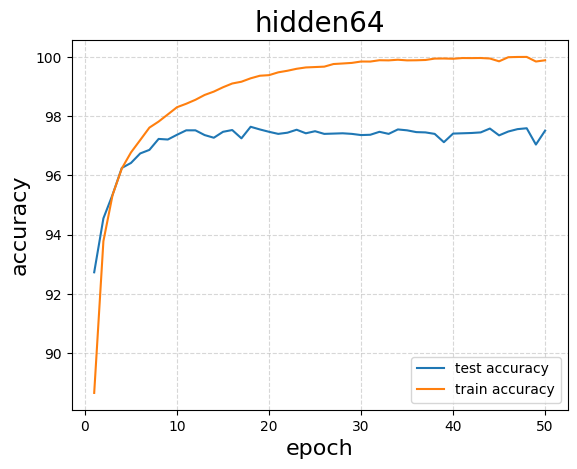

tensor(97.5100)


<Figure size 640x480 with 0 Axes>

In [69]:
#64
num_epochs=50
hidden_size=64
net=Net(input_size,hidden_size, num_classes)
optimizer=torch.optim.Adam(net.parameters(), lr=learning_rate)
net_64=train(net,nn.CrossEntropyLoss(),optimizer,'hidden64')
accuracy=test(net_64)
print(accuracy)
#(97.5100)

Epoch [1/50]
Epoch [2/50]
Epoch [3/50]
Epoch [4/50]
Epoch [5/50]
Epoch [6/50]
Epoch [7/50]
Epoch [8/50]
Epoch [9/50]
Epoch [10/50]
Epoch [11/50]
Epoch [12/50]
Epoch [13/50]
Epoch [14/50]
Epoch [15/50]
Epoch [16/50]
Epoch [17/50]
Epoch [18/50]
Epoch [19/50]
Epoch [20/50]
Epoch [21/50]
Epoch [22/50]
Epoch [23/50]
Epoch [24/50]
Epoch [25/50]
Epoch [26/50]
Epoch [27/50]
Epoch [28/50]
Epoch [29/50]
Epoch [30/50]
Epoch [31/50]
Epoch [32/50]
Epoch [33/50]
Epoch [34/50]
Epoch [35/50]
Epoch [36/50]
Epoch [37/50]
Epoch [38/50]
Epoch [39/50]
Epoch [40/50]
Epoch [41/50]
Epoch [42/50]
Epoch [43/50]
Epoch [44/50]
Epoch [45/50]
Epoch [46/50]
Epoch [47/50]
Epoch [48/50]
Epoch [49/50]
Epoch [50/50]


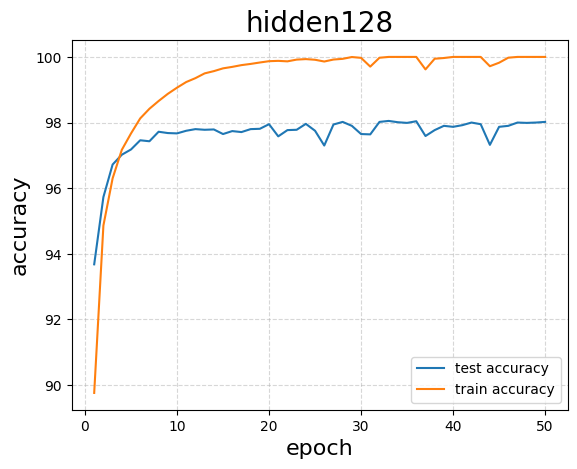

tensor(98.0200)


<Figure size 640x480 with 0 Axes>

In [70]:
#128
hidden_size=128
net=Net(input_size,hidden_size, num_classes)
optimizer=torch.optim.Adam(net.parameters(), lr=learning_rate)
net_128=train(net,nn.CrossEntropyLoss(),optimizer,'hidden128')
accuracy=test(net_128)
print(accuracy)
#(98.0200)

In [73]:
#256
hidden_size=256
net=Net(input_size,hidden_size, num_classes)
optimizer=torch.optim.Adam(net.parameters(), lr=learning_rate)
net_256=train(net,nn.CrossEntropyLoss(),optimizer,'hidden256')
accuracy=test(net_256)
print(accuracy)
#(98.2000)

Epoch [1/50]
Epoch [2/50]
Epoch [3/50]
Epoch [4/50]
Epoch [5/50]
Epoch [6/50]
Epoch [7/50]
Epoch [8/50]
Epoch [9/50]
Epoch [10/50]
Epoch [11/50]
Epoch [12/50]
Epoch [13/50]
Epoch [14/50]
Epoch [15/50]
Epoch [16/50]
Epoch [17/50]
Epoch [18/50]
Epoch [19/50]
Epoch [20/50]
Epoch [21/50]
Epoch [22/50]
Epoch [23/50]
Epoch [24/50]
Epoch [25/50]
Epoch [26/50]
Epoch [27/50]
Epoch [28/50]


KeyboardInterrupt: ignored

Epoch [1/50]
Epoch [2/50]
Epoch [3/50]
Epoch [4/50]
Epoch [5/50]
Epoch [6/50]
Epoch [7/50]
Epoch [8/50]
Epoch [9/50]
Epoch [10/50]
Epoch [11/50]
Epoch [12/50]
Epoch [13/50]
Epoch [14/50]
Epoch [15/50]
Epoch [16/50]
Epoch [17/50]
Epoch [18/50]
Epoch [19/50]
Epoch [20/50]
Epoch [21/50]
Epoch [22/50]
Epoch [23/50]
Epoch [24/50]
Epoch [25/50]
Epoch [26/50]
Epoch [27/50]
Epoch [28/50]
Epoch [29/50]
Epoch [30/50]
Epoch [31/50]
Epoch [32/50]
Epoch [33/50]
Epoch [34/50]
Epoch [35/50]
Epoch [36/50]
Epoch [37/50]
Epoch [38/50]
Epoch [39/50]
Epoch [40/50]
Epoch [41/50]
Epoch [42/50]
Epoch [43/50]
Epoch [44/50]
Epoch [45/50]
Epoch [46/50]
Epoch [47/50]
Epoch [48/50]
Epoch [49/50]
Epoch [50/50]


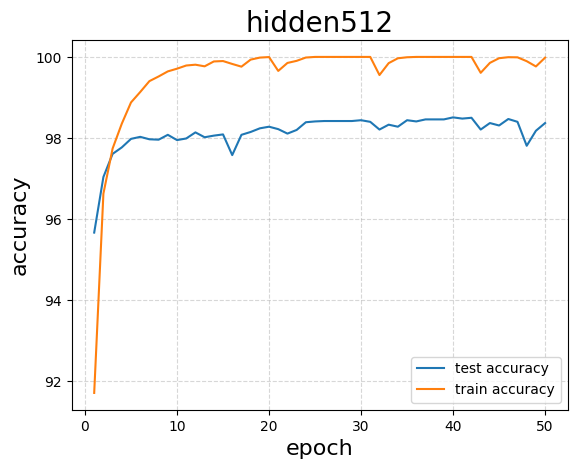

tensor(98.3700)


<Figure size 640x480 with 0 Axes>

In [72]:
#512
hidden_size=512
net=Net(input_size,hidden_size, num_classes)
optimizer=torch.optim.Adam(net.parameters(), lr=learning_rate)
net_512=train(net,nn.CrossEntropyLoss(),optimizer,'hidden512')
accuracy=test(net_512)
print(accuracy)
#(98.3700)

Epoch [1/50]
Epoch [2/50]
Epoch [3/50]
Epoch [4/50]
Epoch [5/50]
Epoch [6/50]
Epoch [7/50]
Epoch [8/50]
Epoch [9/50]
Epoch [10/50]
Epoch [11/50]
Epoch [12/50]
Epoch [13/50]
Epoch [14/50]
Epoch [15/50]
Epoch [16/50]
Epoch [17/50]
Epoch [18/50]
Epoch [19/50]
Epoch [20/50]
Epoch [21/50]
Epoch [22/50]
Epoch [23/50]
Epoch [24/50]
Epoch [25/50]
Epoch [26/50]
Epoch [27/50]
Epoch [28/50]
Epoch [29/50]
Epoch [30/50]
Epoch [31/50]
Epoch [32/50]
Epoch [33/50]
Epoch [35/50]
Epoch [36/50]
Epoch [37/50]
Epoch [38/50]
Epoch [39/50]
Epoch [40/50]
Epoch [41/50]
Epoch [43/50]
Epoch [44/50]
Epoch [45/50]
Epoch [46/50]
Epoch [47/50]
Epoch [48/50]
Epoch [49/50]
Epoch [50/50]


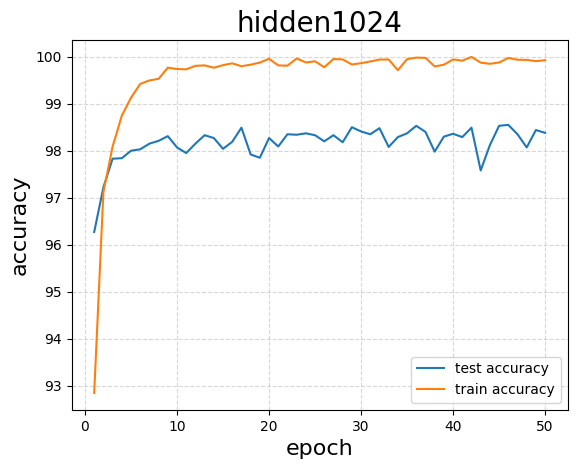

tensor(98.3800)


<Figure size 640x480 with 0 Axes>

Epoch [1/50]
Epoch [2/50]
Epoch [3/50]
Epoch [4/50]
Epoch [5/50]
Epoch [6/50]
Epoch [7/50]
Epoch [8/50]
Epoch [9/50]
Epoch [10/50]
Epoch [11/50]
Epoch [12/50]
Epoch [13/50]
Epoch [14/50]
Epoch [15/50]
Epoch [16/50]
Epoch [17/50]
Epoch [18/50]
Epoch [19/50]
Epoch [20/50]
Epoch [21/50]
Epoch [22/50]
Epoch [23/50]
Epoch [24/50]
Epoch [25/50]
Epoch [26/50]
Epoch [27/50]
Epoch [28/50]
Epoch [29/50]
Epoch [30/50]
Epoch [31/50]
Epoch [32/50]
Epoch [33/50]
Epoch [34/50]
Epoch [35/50]
Epoch [36/50]
Epoch [37/50]
Epoch [38/50]
Epoch [39/50]
Epoch [40/50]
Epoch [41/50]
Epoch [42/50]
Epoch [43/50]
Epoch [44/50]
Epoch [45/50]
Epoch [46/50]
Epoch [47/50]
Epoch [48/50]
Epoch [49/50]
Epoch [50/50]


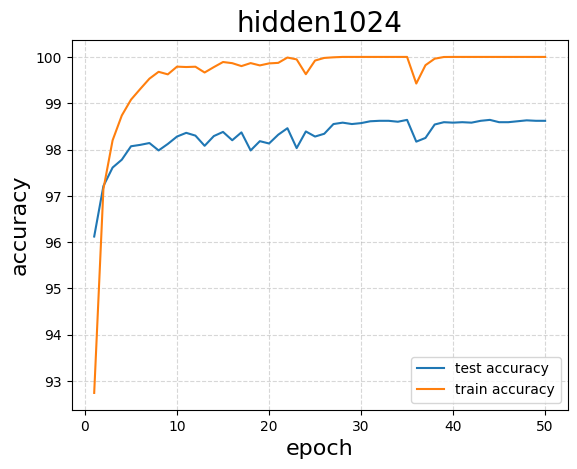

tensor(98.6200)


<Figure size 640x480 with 0 Axes>

In [75]:
#1024
hidden_size=1024
net=Net(input_size,hidden_size, num_classes)
optimizer=torch.optim.Adam(net.parameters(), lr=learning_rate)
net_1024=train(net,nn.CrossEntropyLoss(),optimizer,'hidden1024')
accuracy=test(net_1024)
print(accuracy)
#(98.6200)

# 增加全连接层深度
- 一层hidden
- 两层hidden
- 四层hidden
- 八层hidden

根据控制变量原则，保持其他条件不变

In [96]:
class Net1(nn.Module):
	def __init__(self, input_size,hidden_size,num_classes):
		super(Net1, self).__init__()
		self.fc1=nn.Linear(input_size,hidden_size)
		self.relu=nn.ReLU()
		self.output=nn.Linear(hidden_size, num_classes)

	def forward(self,x):
		out=self.fc1(x)
		out=self.relu(out)
		out=self.output(out)
		return out

class Net2(nn.Module):
	def __init__(self, input_size,hidden_size,second_size,num_classes):
		super(Net2, self).__init__()
		self.relu=nn.ReLU()
		"""两个隐藏层"""
		self.fc1=nn.Linear(input_size,hidden_size)
		self.fc2=nn.Linear(hidden_size,second_size)

		self.output=nn.Linear(second_size, num_classes)

	def forward(self,x):
		x=self.fc1(x)
		x=self.relu(x)
		x=self.fc2(x)
		x=self.relu(x)
		out=self.output(x)
		return out

class Net4(nn.Module):
	def __init__(self, input_size,hidden_size,second_size,third_size,fourth_size,num_classes):
		super(Net4, self).__init__()
		self.relu=nn.ReLU()
		"""四个隐藏层"""
		self.fc1=nn.Linear(input_size,hidden_size)
		self.fc2=nn.Linear(hidden_size,second_size)
		self.fc3=nn.Linear(second_size,third_size)
		self.fc4=nn.Linear(third_size,fourth_size)

		self.output=nn.Linear(fourth_size, num_classes)

	def forward(self,x):
		x=self.fc1(x)
		x=self.relu(x)
		x=self.fc2(x)
		x=self.relu(x)
		x=self.fc3(x)
		x=self.relu(x)
		x=self.fc4(x)
		x=self.relu(x)
		out=self.output(x)
		return out
class Net8(nn.Module):
	def __init__(self, input_size,hidden_size,second_size,third_size,fourth_size,fifth_size,sixth_size,seventh_size,eighth_size,num_classes):
		super(Net8, self).__init__()
		self.relu=nn.ReLU()
		"""四个隐藏层"""
		self.fc1=nn.Linear(input_size,hidden_size)
		self.fc2=nn.Linear(hidden_size,second_size)
		self.fc3=nn.Linear(second_size,third_size)
		self.fc4=nn.Linear(third_size,fourth_size)
		self.fc5=nn.Linear(fourth_size,fifth_size)
		self.fc6=nn.Linear(fifth_size,sixth_size)
		self.fc7=nn.Linear(sixth_size,seventh_size)
		self.fc8=nn.Linear(seventh_size,eighth_size)
		self.output=nn.Linear(eighth_size, num_classes)

	def forward(self,x):
		x=self.fc1(x)
		x=self.relu(x)
		x=self.fc2(x)
		x=self.relu(x)
		x=self.fc3(x)
		x=self.relu(x)
		x=self.fc4(x)
		x=self.relu(x)
		x=self.fc5(x)
		x=self.relu(x)
		x=self.fc6(x)
		x=self.relu(x)
		x=self.fc7(x)
		x=self.relu(x)
		x=self.fc8(x)
		x=self.relu(x)
		out=self.output(x)
		return out


Epoch [1/50]
Epoch [2/50]
Epoch [3/50]
Epoch [4/50]
Epoch [5/50]
Epoch [6/50]
Epoch [7/50]
Epoch [8/50]
Epoch [9/50]
Epoch [10/50]
Epoch [11/50]
Epoch [12/50]
Epoch [13/50]
Epoch [14/50]
Epoch [15/50]
Epoch [16/50]
Epoch [17/50]
Epoch [18/50]
Epoch [19/50]
Epoch [20/50]
Epoch [21/50]
Epoch [22/50]
Epoch [23/50]
Epoch [24/50]
Epoch [25/50]
Epoch [26/50]
Epoch [27/50]
Epoch [28/50]
Epoch [29/50]
Epoch [30/50]
Epoch [31/50]
Epoch [32/50]
Epoch [33/50]
Epoch [34/50]
Epoch [35/50]
Epoch [36/50]
Epoch [37/50]
Epoch [38/50]
Epoch [39/50]
Epoch [40/50]
Epoch [41/50]
Epoch [42/50]
Epoch [43/50]
Epoch [44/50]
Epoch [45/50]
Epoch [46/50]
Epoch [47/50]
Epoch [48/50]
Epoch [49/50]
Epoch [50/50]


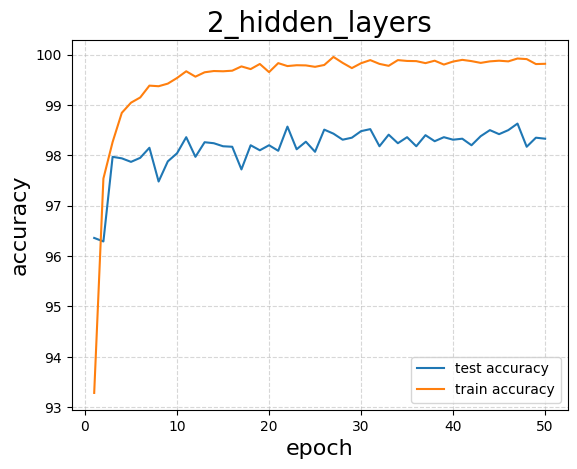

tensor(98.3300)


<Figure size 640x480 with 0 Axes>

In [94]:
#net2
hidden_size=1024
second_size=512
net=Net2(input_size,hidden_size, 
         second_size,
         num_classes)
optimizer=torch.optim.Adam(net.parameters(), lr=learning_rate)
net_2_layers=train(net,nn.CrossEntropyLoss(),optimizer,'2_hidden_layers')
accuracy=test(net_2_layers)
print(accuracy)
#(98.3300)

Epoch [1/50]
Epoch [2/50]
Epoch [3/50]
Epoch [4/50]
Epoch [5/50]
Epoch [6/50]
Epoch [7/50]
Epoch [8/50]
Epoch [9/50]
Epoch [10/50]
Epoch [11/50]
Epoch [12/50]
Epoch [13/50]
Epoch [14/50]
Epoch [15/50]
Epoch [16/50]
Epoch [17/50]
Epoch [18/50]
Epoch [19/50]
Epoch [20/50]
Epoch [21/50]
Epoch [22/50]
Epoch [23/50]
Epoch [24/50]
Epoch [25/50]
Epoch [26/50]
Epoch [27/50]
Epoch [28/50]
Epoch [29/50]
Epoch [30/50]
Epoch [31/50]
Epoch [32/50]
Epoch [33/50]
Epoch [34/50]
Epoch [35/50]
Epoch [36/50]
Epoch [37/50]
Epoch [38/50]
Epoch [39/50]
Epoch [40/50]
Epoch [41/50]
Epoch [42/50]
Epoch [43/50]
Epoch [44/50]
Epoch [45/50]
Epoch [46/50]
Epoch [47/50]
Epoch [48/50]
Epoch [49/50]
Epoch [50/50]


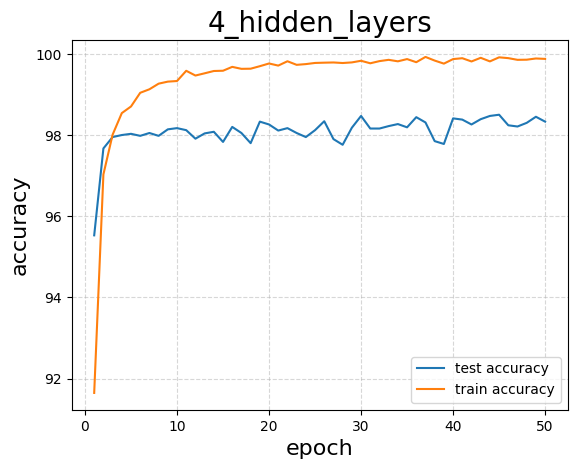

tensor(98.3300)


<Figure size 640x480 with 0 Axes>

In [97]:
#net4
hidden_size=1024
second_size=512
third_size=256
fourth_size=128
net=Net4(input_size,hidden_size,second_size,third_size,fourth_size, num_classes)
optimizer=torch.optim.Adam(net.parameters(), lr=learning_rate)
net_4_layers=train(net,nn.CrossEntropyLoss(),optimizer,'4_hidden_layers')
accuracy=test(net_4_layers)
print(accuracy)
#(98.3300)

Epoch [1/50]
Epoch [2/50]
Epoch [3/50]
Epoch [4/50]
Epoch [5/50]
Epoch [6/50]
Epoch [7/50]
Epoch [8/50]
Epoch [9/50]
Epoch [10/50]
Epoch [11/50]
Epoch [12/50]
Epoch [13/50]
Epoch [14/50]
Epoch [15/50]
Epoch [16/50]
Epoch [17/50]
Epoch [18/50]
Epoch [19/50]
Epoch [20/50]
Epoch [21/50]
Epoch [22/50]
Epoch [23/50]
Epoch [24/50]
Epoch [25/50]
Epoch [26/50]
Epoch [27/50]
Epoch [28/50]
Epoch [29/50]
Epoch [30/50]
Epoch [31/50]
Epoch [32/50]
Epoch [33/50]
Epoch [34/50]
Epoch [35/50]
Epoch [36/50]
Epoch [37/50]
Epoch [38/50]
Epoch [39/50]
Epoch [40/50]
Epoch [41/50]
Epoch [42/50]
Epoch [43/50]
Epoch [44/50]
Epoch [45/50]
Epoch [46/50]
Epoch [47/50]
Epoch [48/50]
Epoch [49/50]
Epoch [50/50]


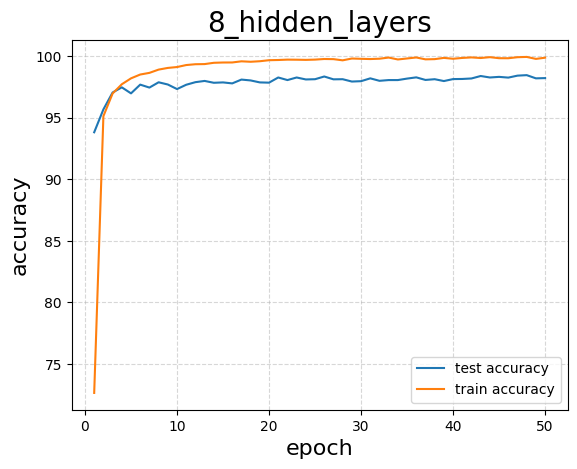

tensor(98.2200)


<Figure size 640x480 with 0 Axes>

In [98]:
#net8
fifth_size=64
sixth_size=32
seventh_size=16
eighth_size=8
net=Net8(input_size,hidden_size,second_size,third_size,fourth_size,fifth_size,sixth_size,seventh_size,eighth_size,num_classes)
optimizer=torch.optim.Adam(net.parameters(), lr=learning_rate)
net_8_layers=train(net,nn.CrossEntropyLoss(),optimizer,'8_hidden_layers')
accuracy=test(net_8_layers)
print(accuracy)
#(98.2200)

# 学习率调整策略
PyTorch学习率调整策略通过torch.optim.lr_scheduler接口实现。PyTorch提供的学习率调整策略分为三大类，分别是
- 有序调整：等间隔调整(Step)，按需调整学习率(MultiStep)，指数衰减调整(Exponential)和 余弦退火CosineAnnealing。
- 自适应调整：自适应调整学习率 ReduceLROnPlateau。
- 自定义调整：自定义调整学习率 LambdaLR。


In [ ]:
def trainLR(net, criterion, optimizer, name, scheduler):
	if cuda:
		criterion.cuda()
		optimizer.cuda()
	train_accuracy = []
	test_accuracy = []
	for epoch in range(num_epochs):
		correct = 0
		total = 0
		for i, (images, labels) in enumerate(train_loader):
			images = Variable(images.view(-1, 28 * 28))
			labels = Variable(labels)

			optimizer.zero_grad()
			outputs = net(images)
			loss = criterion(outputs, labels)
			loss.backward()
			optimizer.step()
			scheduler.step(loss)
	 #scheduler为学习率调整策略,针对loss进行学习率改变。记得加上评价指标loss。这条语句可放在epoch的循环位置，要放在batch循环位置也可以，只是正对patience对象不同。

			_, predicted = torch.max(outputs.data, 1)
			total += labels.size(0)
			correct += (predicted == labels).sum()

		train_accuracy.append(100 * correct / total)
		print('Epoch [%d/%d]' % (epoch + 1, num_epochs))
		correct = 0
		total = 0

		for images, labels in test_loader:
			images = Variable(images.view(-1, 28 * 28))
			outputs = net(images)
			_, predicted = torch.max(outputs.data, 1)
			total += labels.size(0)
			correct += (predicted == labels).sum()
		test_accuracy.append(100 * correct / total)
	x = np.linspace(1, num_epochs, num_epochs)
	plt.plot(x, test_accuracy)
	plt.plot(x, train_accuracy)
	plt.legend(['test accuracy', 'train accuracy'])
	plt.grid(True, linestyle='--', alpha=0.5)
	plt.xlabel("epoch", fontdict={'size': 16})
	plt.ylabel("accuracy", fontdict={'size': 16})
	plt.title(name, fontdict={'size': 20})
	plt.show()
	name = name + '.png'
	plt.savefig(name)
	return net


## 等间隔调整学习率 StepLR
等间隔调整学习率，调整倍数为 gamma 倍，调整间隔为 step_size。间隔单位是step。需要注意的是， step 通常是指 epoch，不要弄成 iteration 了。

In [ ]:
hidden_size=512
step_size=10
learning_rate=0.1
net=Net(input_size,hidden_size, num_classes)
optimizer=torch.optim.Adam(net.parameters(), lr=learning_rate)
scheduler=torch.optim.lr_scheduler.StepLR(optimizer, step_size, gamma=0.1, last_epoch=-1)
net_StepLR=trainLR(net,nn.CrossEntropyLoss(),optimizer,'StepLR',scheduler)
accuracy=test(net_StepLR)
print(accuracy)


## 自适应调整学习率 ReduceLROnPlateau
当某指标不再变化（下降或升高），调整学习率，这是非常实用的学习率调整策略。
例如，当验证集的 loss 不再下降时，进行学习率调整；或者监测验证集的 accuracy，当accuracy 不再上升时，则调整学习率。

参数：

- mode(str)
模式选择，有 min 和 max 两种模式， min 表示当指标不再降低(如监测loss)， max 表示当指标不再升高(如监测 accuracy)。

- factor(float)
学习率调整倍数(等同于其它方法的 gamma)，即学习率更新为 lr = lr * factor

- patience(int)
忍受该指标多少个 step 不变化，当忍无可忍时，调整学习率。

- verbose(bool)
是否打印学习率信息， print(‘Epoch {:5d}: reducing learning rate of group {} to {:.4e}.’.format(epoch, i, new_lr))

- threshold_mode(str)
选择判断指标是否达最优的模式，有两种模式， rel 和 abs。
当 threshold_mode == rel，并且 mode == max 时， dynamic_threshold = best * ( 1 +threshold )；
当 threshold_mode == rel，并且 mode == min 时， dynamic_threshold = best * ( 1 -threshold )；
当 threshold_mode == abs，并且 mode== max 时， dynamic_threshold = best + threshold ；
当 threshold_mode == rel，并且 mode == max 时， dynamic_threshold = best - threshold；

- threshold(float)
配合 threshold_mode 使用。

- cooldown(int)
“冷却时间“，当调整学习率之后，让学习率调整策略冷静一下，让模型再训练一段时间，再重启监测模式。

- min_lr(float or list)
学习率下限，可为 float，或者 list，当有多个参数组时，可用 list 进行设置。

- eps(float)
学习率衰减的最小值，当学习率变化小于 eps 时，则不调整学习率。

In [ ]:
learning_rate=0.001
net=Net(input_size,hidden_size, num_classes)
optimizer=torch.optim.Adam(net.parameters(), lr=learning_rate)
schedule=torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)
net_StepLR=trainLR(net,nn.CrossEntropyLoss(),optimizer,'StepLR',scheduler)
accuracy=test(net_StepLR)
print(accuracy)
